# Silcton MRI Processing and Analyses

Data, info on Virtual Silcton, analysis plan can all be found here: https://osf.io/ea99d/

In [1]:
#import packages

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
from cycler import cycler
import seaborn as sns
# For statistics. Requires statsmodels 5.0 or more
from statsmodels.formula.api import ols



In [2]:
def zscore(column, data):
    #Calculate and return the z-score value of a variable from a DataFrame
    zscoredVariable = (data[column] - data[column].mean())/data[column].std(ddof=0)
    return zscoredVariable

In [3]:
def doAnova(dependentVar,data):
    data = data[np.isfinite(data[dependentVar])]
    grps = pd.unique(data.groups.values)
    d_data = {grp:data[dependentVar][data.groups == grp] for grp in grps}
    F, p = scipy.stats.f_oneway(d_data[1], d_data[2], d_data[3])
    print('F = ',F,'p = ',p)

In [4]:
def stderror(dependentVar):
    std = np.std(dependentVar)
    n = len(dependentVar)
    sem = std / np.sqrt(n)
    
    return sem

In [5]:
def saveTheFig(name1,name2,f):
    
    figName = 'scatter'+name1.capitalize()+name2.capitalize()+'.pdf'
    
    prompt = 'save figure with ' + name1.capitalize() + name2.capitalize() + '? y/n '
    
    a = input(prompt)

    if a.lower() == 'y':
        f.savefig(figName, format='pdf',transparent=True,)


In [6]:
def formatPlot(x,y,plot,linecolor,ax1):
    ax1.set_xlabel(x.name,fontsize=20)
    ax1.set_ylabel(y.name,fontsize=20)
    ax1.tick_params(axis='both', which='major', labelsize=14)
    fit = np.polyfit(x, y, deg=1) # calculate regression line
    ax1.plot(x, fit[0] * x + fit[1], color=linecolor,label='',linewidth=2) # print lines as black
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
    pearsonR = 'r = ' + "{0:.2f}".format(r_value)
    locationOffset = (min(y) - max(y)) / 10
    location = (max(x)*fit[0] + fit[1]) + locationOffset
    ax1.text(max(x),location,pearsonR,horizontalalignment='right',fontsize=14,color=linecolor)
    ax1.legend(edgecolor='black',fontsize=14)
    fig = plt.gcf()
    fig.set_size_inches(10.5, 10.5)
    #plt.show()


## Import and process data

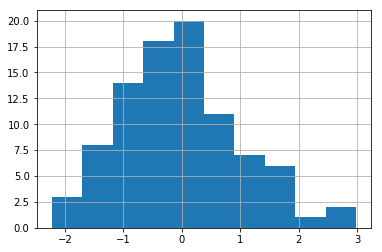

In [21]:
#import and process data - including Z-scoring all columns

data = pd.read_csv('https://raw.githubusercontent.com/smweis/Silcton_MRI/master/public_data/DataAnalysisWith90Participants_Jupyter.csv')

#variables
normedData = pd.DataFrame()

#exclude outliers from total hippocampal volume (both high and low outliers)

#data = data[data['ASHS_right_total_hippo'] >  data['ASHS_right_total_hippo'].mean() - data['ASHS_right_total_hippo'].std()*3]
#data = data[data['ASHS_right_total_hippo'] <  data['ASHS_right_total_hippo'].mean() + data['ASHS_right_total_hippo'].std()*3]


#Normalize all the variables
normedData['brainVol']= zscore('BrainSegVol',data)
normedData['cortexVol']= zscore('CortexVol',data)
normedData['lhc']= zscore('Left_Hippocampus',data)
normedData['rhc'] = zscore('Right_Hippocampus',data)
normedData['lamyg'] = zscore('Left_Amygdala',data)
normedData['ramyg'] = zscore('Right_Amygdala',data)
normedData['csf'] = zscore('Cerebrospinal_Fluid',data)
normedData['rhc_bodytail'] = zscore('Right_BodyTail',data)
normedData['rhc_head'] = zscore('Right_Head',data)
normedData['lhc_bodytail'] = zscore('Left_BodyTail',data)
normedData['lhc_head'] = zscore('Left_Head',data)
normedData['pointBetween'] = zscore('Pointing_Between',data)
normedData['pointWithin'] = zscore('Pointing_Within',data)
normedData['pointTotal'] = zscore('Pointing_Total',data)
normedData['rcaud'] = zscore('Right_Caudate',data)
normedData['lcaud'] = zscore('Left_Caudate',data)
normedData['sbsod'] = zscore('SBSOD',data)
normedData['wrat'] = zscore('WRAT',data)
normedData['mrt'] = zscore('MRT',data)
normedData['groups'] = data['int1non2imp3']
normedData['age'] = zscore('Age',data)
normedData['batch'] = data['Batch']
normedData['gender'] = data['Gender']
normedData['ashs_rhc'] = zscore('ASHS_right_total_hippo', data)
normedData['ashs_lhc'] = zscore('ASHS_left_total_hippo',data)
normedData['ashs_post_rhc'] = zscore('ASHS_right_Posterior_hippocampus', data)
normedData['ashs_post_lhc'] = zscore('ASHS_left_Posterior_hippocampus',data)
normedData['ashs_ant_rhc'] = zscore('ASHS_right_Anterior_hippocampus', data)
normedData['ashs_ant_lhc'] = zscore('ASHS_left_Anterior_hippocampus',data)
normedData['ashs_total_hipp'] = zscore('ASHS_total_hippo',data)
normedData['ashs_rerc'] = zscore('ASHS_right_ERC', data)
normedData['ashs_lerc'] = zscore('ASHS_left_ERC',data)
normedData['ashs_lphc'] = zscore('ASHS_left_PHC', data)
normedData['ashs_rphc'] = zscore('ASHS_right_PHC',data)
normedData['ashs_lbr35'] = zscore('ASHS_left_Br35', data)
normedData['ashs_rbr35'] = zscore('ASHS_right_Br35',data)
normedData['ashs_lbr36'] = zscore('ASHS_left_Br36', data)
normedData['ashs_rbr36'] = zscore('ASHS_right_Br36',data)



#reverse the pointing ones to be higher = good score
normedData['pointBetween'] = -1*(normedData['pointBetween'])
normedData['pointWithin'] = -1*(normedData['pointWithin'])
normedData['pointTotal'] = -1*(normedData['pointTotal'])


#check any histograms
normedData['lhc_bodytail'].hist()
#normedData['ashs_rhc'].hist()


#data.shape
#normedData.shape

In [8]:
def makeNavGroupPlot(xname,yname,d,savefig=False):

    """Will make a formatted scatter plot colored by all three groups"""
    
    x = normedData.loc[:,xname]
    y = normedData.loc[:,yname]
    f, ax1 = plt.subplots(1)
    group_dict = {1:['#00B050','Integrators'],2:['#E46C0A','Non-Integrators'],3:['#4BACC6','Imprecise Navigators']}



    for kind in group_dict:
        d = normedData[normedData.groups==kind]
        plt.scatter(d.loc[:,xname], d.loc[:,yname],
            c = group_dict[kind][0],label=group_dict[kind][1],s=60)
        plt.hlines(np.mean(d.loc[:,yname]), np.mean(d.loc[:,xname]) - stderror(d.loc[:,xname]), np.mean(d.loc[:,xname]) + stderror(d.loc[:,xname]), linestyle='dashed')
        plt.vlines(np.mean(d.loc[:,xname]), np.mean(d.loc[:,yname]) - stderror(d.loc[:,yname]), np.mean(d.loc[:,yname]) + stderror(d.loc[:,yname]), linestyle='dashed')
        plt.plot(np.mean(d.loc[:,xname]), np.mean(d.loc[:,yname]), marker='o', markersize=20
                 , color=group_dict[kind][0], markeredgecolor='black')
        formatPlot(d.loc[:,xname],d.loc[:,yname],f,group_dict[kind][0],ax1)

    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
    pearsonR = 'r = ' + "{0:.2f}".format(r_value)
    
    fit = np.polyfit(x, y, deg=1) # calculate regression line
    ax1.plot(x, fit[0] * x + fit[1], color='gray',label='Total',linewidth=2) # print lines as black

    locationOffset = (max(y) - min(y)) / 20
    location = (max(x)*fit[0] + fit[1]) + locationOffset
    ax1.text(max(x),location,pearsonR,horizontalalignment='right', fontsize=14)

    if savefig:
        saveTheFig(x.name,y.name,f)



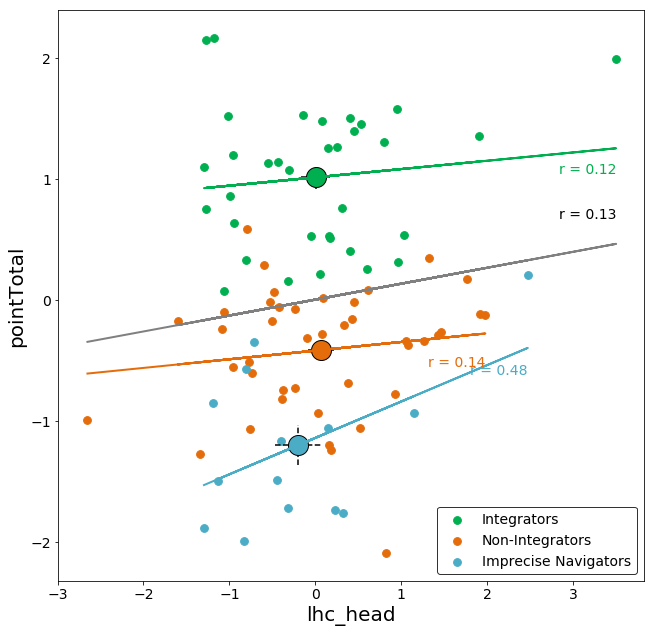

In [9]:
makeNavGroupPlot('lhc_head','pointTotal',normedData)


## Create scatterplots

In [10]:
# Figures for iNav Poster

makeNavGroupPlot('ashs_rhc','pointTotal',normedData)


C:\Users\stweis\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
C:\Users\stweis\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\stweis\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\stweis\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\stweis\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
C:\Users\stweis\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfi

ValueError: cannot convert float NaN to integer

In [11]:
makeNavGroupPlot('ashs_post_rhc','pointTotal',normedData)


C:\Users\stweis\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
C:\Users\stweis\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\stweis\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\stweis\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\stweis\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
C:\Users\stweis\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfi

ValueError: cannot convert float NaN to integer

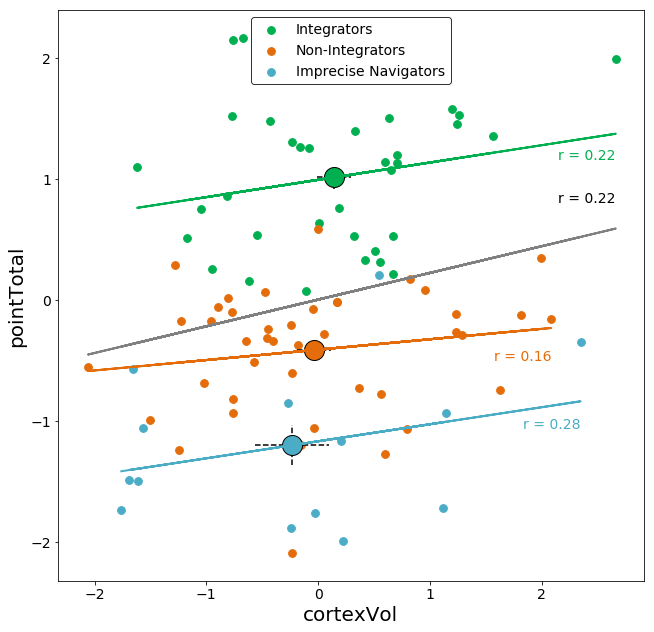

In [12]:
makeNavGroupPlot('cortexVol','pointTotal',normedData)


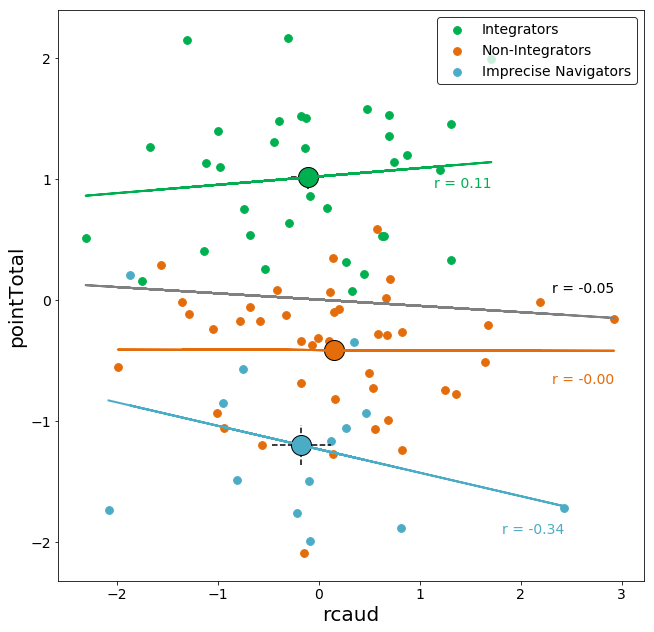

In [13]:
makeNavGroupPlot('rcaud','pointTotal',normedData)


In [14]:
makeNavGroupPlot('ashs_rhc','sbsod',normedData)


C:\Users\stweis\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
C:\Users\stweis\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\stweis\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\stweis\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\stweis\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
C:\Users\stweis\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfi

ValueError: cannot convert float NaN to integer

In [15]:
makeNavGroupPlot('ashs_rhc','mrt',normedData)


C:\Users\stweis\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
C:\Users\stweis\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\stweis\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\stweis\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\stweis\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
C:\Users\stweis\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfi

ValueError: cannot convert float NaN to integer

In [16]:
makeNavGroupPlot('ashs_ant_rhc','pointTotal',normedData)

C:\Users\stweis\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
C:\Users\stweis\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\stweis\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\stweis\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\stweis\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
C:\Users\stweis\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfi

ValueError: cannot convert float NaN to integer

In [17]:
# ANOVAS on three groups (not on poster)

doAnova('ashs_post_rhc',normedData)



F =  0.5987943742666302 p =  0.5518298362960903


In [18]:
# additional analyses for control (numbers not on poster)

nonannormedData = normedData.dropna()


model_fit = ols("pointTotal ~ lhc_bodytail * gender * age * cortexVol", normedData).fit()
print(model_fit.summary())



                            OLS Regression Results                            
Dep. Variable:             pointTotal   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                 -0.081
Method:                 Least Squares   F-statistic:                    0.5559
Date:                Thu, 19 Jul 2018   Prob (F-statistic):              0.899
Time:                        12:23:08   Log-Likelihood:                -122.90
No. Observations:                  90   AIC:                             277.8
Df Residuals:                      74   BIC:                             317.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

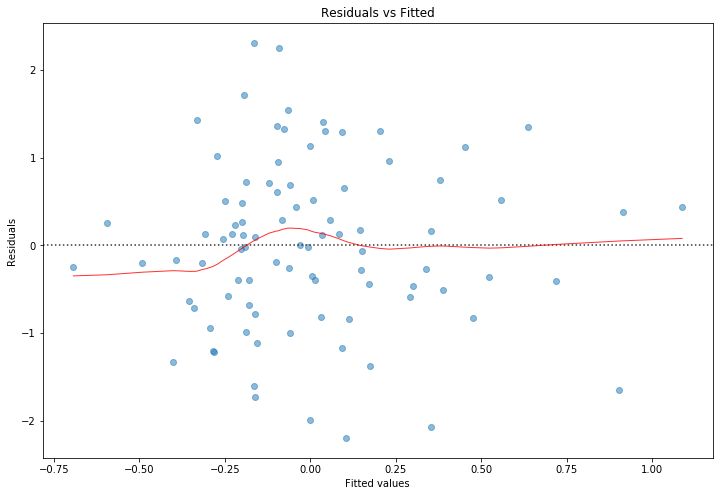

In [19]:
# fitted values (need a constant term for intercept)
model_fitted_y = model_fit.fittedvalues
# model residuals
model_residuals = model_fit.resid
# normalized residuals
model_norm_residuals = model_fit.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
# absolute residuals
model_abs_resid = np.abs(model_residuals)
# leverage, from statsmodels internals
model_leverage = model_fit.get_influence().hat_matrix_diag
# cook's distance, from statsmodels internals
model_cooks = model_fit.get_influence().cooks_distance[0]


plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)
plot_lm_1.axes[0] = sns.residplot(model_fitted_y, 'pointTotal', data=normedData, 
                          lowess=True, 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')


plt.show()



In [20]:
def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''
    fig = plt.figure(figsize=(size,size))
    ax1 = fig.add_subplot(111)
    cmap = plt.cm.get_cmap('jet')
    a = df.corr()
    np.fill_diagonal(a.values,np.nan)
    masked_array = np.ma.array (a, mask=np.isnan(a))
    cmap.set_bad('black',1.)
    ax1.imshow(masked_array, interpolation='nearest', cmap=cmap)
    cax = ax1.imshow(a, interpolation="nearest", cmap=cmap)
    plt.xticks(range(len(df.columns)), df.columns);
    plt.yticks(range(len(df.columns)), df.columns);
    print(a)
    fig.colorbar(cax)
    return a

order = [0,19,21,10,11,9,12,13,14,]
cols = noOutliers.columns.tolist()

mylist = [ cols[i] for i in order]

orderedNormedData = noOutliers[mylist]
corrMat = plot_corr(orderedNormedData,20)
plt.show()

#a = noOutliers.corr()
#display(a.style.background_gradient())
nonanOrderedData = orderedNormedData.dropna()
g = sns.clustermap(nonanOrderedData)

"""Index(['brainVol', 'cortexVol', 'lhc', 'rhc', 'lamyg', 'ramyg', 'csf',
       'pointBetween', 'pointWithin', 'pointTotal', 'rcaud', 'lcaud', 'sbsod',
       'wrat', 'mrt', 'groups', 'age', 'batch', 'gender', 'ashs_rhc',
       'ashs_lhc', 'ashs_post_rhc', 'ashs_post_lhc', 'ashs_ant_rhc',
       'ashs_ant_lhc', 'ashs_total_hipp', 'ashs_rerc', 'ashs_lerc',
       'ashs_lphc', 'ashs_rphc', 'ashs_lbr35', 'ashs_rbr35', 'ashs_lbr36',
       'ashs_rbr36'],"""

NameError: name 'noOutliers' is not defined

In [ ]:
pwd